In [1]:
#load base libraries
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['cmr10']  # This sets the Computer Modern Roman font
matplotlib.rcParams['text.usetex'] = False  # Ensure LaTeX is not being used for rendering
matplotlib.rcParams['axes.unicode_minus'] = False

# Alternatively, you can specify other font properties if needed
matplotlib.rcParams['font.size'] = 14  # Set the global font size
matplotlib.rcParams['axes.titlesize'] = 14  # Set the axes title font size
matplotlib.rcParams['axes.labelsize'] = 12  # Set the axes labels font size
matplotlib.rcParams['xtick.labelsize'] = 12  # Set the x-tick labels font size
matplotlib.rcParams['ytick.labelsize'] = 12  # Set the y-tick labels font size
matplotlib.rcParams['legend.fontsize'] = 12  # Set the legend font size

def save_jpg(file_name):
    plt.savefig(file_name, bbox_inches='tight', dpi=199, pad_inches=0)

In [2]:
dataset_index = 1
#load dataset into pandas 
df = pd.read_csv(f'data/{dataset_index:02d}/cycling_wExpansion.csv')
df_resistance = pd.read_csv(f'data/{dataset_index:02d}/Resistance.csv')
N = len(df)
print(df.columns)
# TODO consider renaming signals
df.rename(columns = {
    #'Time [s]' : 'Time'
    #"Current [mA]" : "Current",
    #'Voltage [V]' : 'Voltage',
    #'Expansion [mu m]' : 'Expansion',
    #'Temperature [C]' : 'Temperature',
    #'Q [Ah]' : 'Q',
    #'Capacity [Ah]' : 'Capacity',
    }, errors='raise', inplace=True)
print(df.columns)

Index(['Time [s]', 'Current [mA]', 'Voltage [V]', 'Expansion [mu m]',
       'Temperature [C]', 'Q [Ah]', 'Capacity [Ah]', 'Cycle number'],
      dtype='object')
Index(['Time [s]', 'Current [mA]', 'Voltage [V]', 'Expansion [mu m]',
       'Temperature [C]', 'Q [Ah]', 'Capacity [Ah]', 'Cycle number'],
      dtype='object')


In [3]:
# Analyze the resistance data
cycles_available = df_resistance['Cycle number'].unique()
print(f'{len(cycles_available) = } {cycles_available = }')
df_resistance.describe().T

len(cycles_available) = 11 cycles_available = array([  0,  41,  59,  98, 134, 175, 216, 257, 298, 339, 380], dtype=int64)


,count,mean,std,min,25%,50%,75%,max
Time [s],164967.0,27324.513716,14056.974094,0.000000,16254.641772,27399.281301,38672.456837,55239.126624
Current [mA],164967.0,-86.017806,766.132877,-5000.092800,0.000000,0.000000,0.000000,5004.060100
Voltage [V],164967.0,3.751925,0.210393,2.999958,3.618565,3.707381,3.906324,4.200502
Frequency [Hz],164967.0,18.404133,331.101416,0.000000,0.000000,0.000000,0.000000,10001.000000
Magnitude [Ohm],164967.0,0.000210,0.001500,0.000000,0.000000,0.000000,0.000000,0.024940
Phase [deg],164967.0,-0.082040,1.292610,-31.749649,0.000000,0.000000,0.000000,41.744408
Re [Ohm],164967.0,0.000208,0.001482,0.000000,0.000000,0.000000,0.000000,0.023749
-Im [Ohm],164967.0,0.000019,0.000237,-0.004318,0.000000,0.000000,0.000000,0.007616
Temperature [C],164967.0,23.868088,1.515674,20.377163,22.872383,24.337830,24.995300,27.300407
Q [Ah],164967.0,-1.453845,1.233482,-4.190241,-2.401404,-1.449887,-0.369623,0.890233


99 peaks located at peaks = array([  1891,   3466,   5041,   6616,   8191,   9766,  11341,  12916,
        14491,  16846,  18421,  19996,  21571,  23146,  24721,  26296,
        27871,  29446,  31818,  33393,  34968,  36543,  38118,  39693,
        41268,  42843,  44418,  46812,  48387,  49962,  51537,  53112,
        54687,  56262,  57837,  59412,  61808,  63383,  64958,  66533,
        68108,  69683,  71258,  72833,  74408,  76808,  78383,  79958,
        81533,  83108,  84683,  86258,  87833,  89408,  91802,  93377,
        94952,  96527,  98102,  99677, 101252, 102827, 104402, 106799,
       108374, 109949, 111524, 113099, 114674, 116249, 117824, 119399,
       121811, 123386, 124961, 126536, 128111, 129686, 131261, 132836,
       134411, 136849, 138424, 139999, 141574, 143149, 144724, 146299,
       147874, 149449, 151899, 153474, 155049, 156624, 158199, 159774,
       161349, 162924, 164499], dtype=int64)


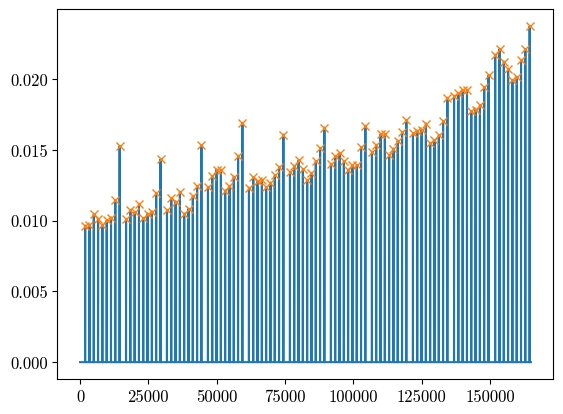

In [4]:
# Take the real resistance and find peaks in it
R = df_resistance['Re [Ohm]']
peaks, properties = scipy.signal.find_peaks(R, prominence=(0.005, None), distance=1000)
print(f'{len(peaks)} peaks located at {peaks = }')
plt.plot(R)
plt.plot(peaks, R[peaks], 'x')

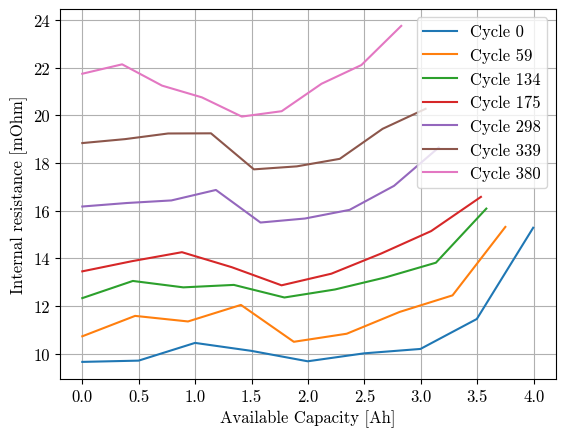

In [5]:
# Get data for each peak
for cycle_number, data in df_resistance.iloc[peaks].groupby('Cycle number'):
    if cycle_number in (41, 98, 216, 257): # Hand crafted to get less mess in the figure
        continue
    C = data['Q [Ah]'].max() - data['Q [Ah]']
    plt.plot(C, data['Re [Ohm]'] * 1e3, label=f'Cycle {cycle_number}')
plt.xlabel('Available Capacity [Ah]')
plt.ylabel('Internal resistance [mOhm]')
plt.legend(loc='upper right')
plt.grid(True)
save_jpg('figures/R.jpg')

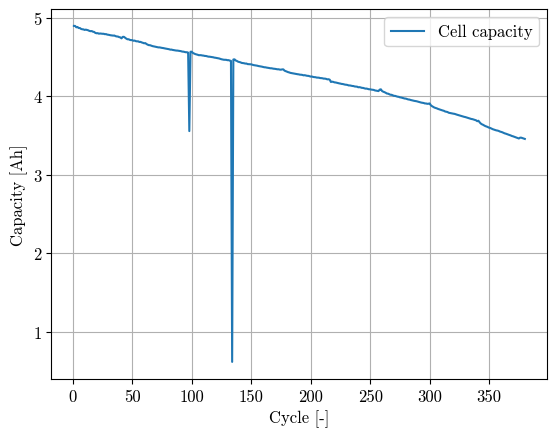

In [6]:
# Show how the capacity drops over time
num_cycles = df['Cycle number'].max() + 1
capacity = []
for cycle in range(num_cycles):
    mask = df['Cycle number'] == cycle
    C = df[mask]['Capacity [Ah]'].max()
    capacity.append(C)

plt.plot(np.arange(1, num_cycles + 1), capacity, label='Cell capacity')
plt.xlabel('Cycle [-]')
plt.ylabel('Capacity [Ah]')
plt.legend()
plt.grid(True)
save_jpg('figures/aging.jpg')

In [7]:
# remove discharging
keep_mask = df['Current [mA]'] > 0
print(f'Removing {keep_mask.sum() / N*100:.1f} % of the dataset')
df = df[keep_mask]

Removing 51.2 % of the dataset


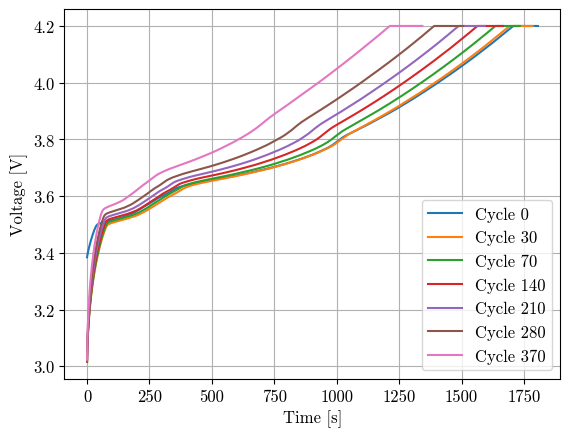

In [8]:
def plot_signals(df, signal, cycles, align_zero=False):
    for cycle in cycles:
        cycle_mask = df['Cycle number'] == cycle
        data = df[cycle_mask].reset_index()[signal]
        if align_zero:
            data = data - data.min()
        data.plot(label=f'Cycle {cycle}')
    plt.grid(True)
    plt.xlabel('Time [s]')
    plt.ylabel(signal)
    plt.legend()

cycles = [0, 30, 70, 140, 210, 280, 370]
# plot charging cycle, first and last, y-axis voltage
plot_signals(df, 'Voltage [V]', cycles)
save_jpg(f'figures/voltages.jpg')

# ToDo: do some more plotting, current, temperature, capacity...

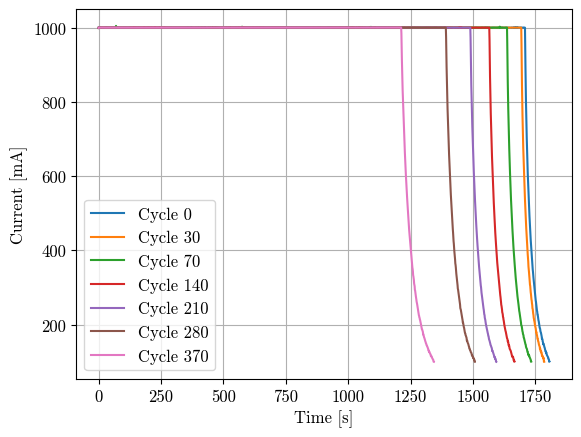

In [9]:
plot_signals(df, 'Current [mA]', cycles)
save_jpg(f'figures/currents.jpg')

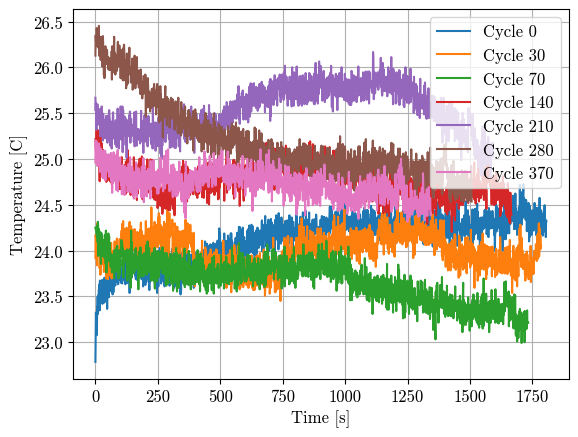

In [10]:
plot_signals(df, 'Temperature [C]', cycles)
#save_jpg(f'figures/temperatures.jpg')

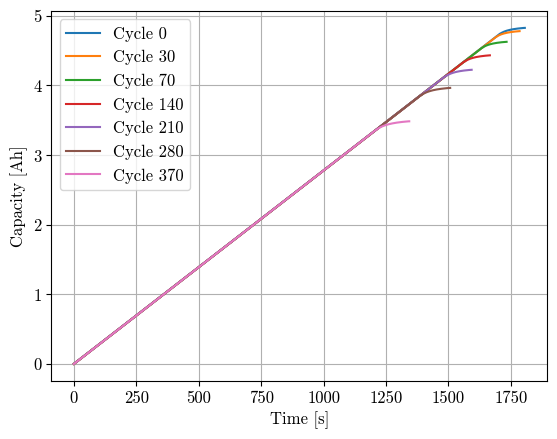

In [11]:
plot_signals(df, 'Capacity [Ah]', cycles)
save_jpg(f'figures/capacities.jpg')

In [12]:
# ToDo: try to compare the models based on charging ,discharging, discuss what is more suitable for predictions
ids_test = [1, 12, 33, 49, 50, 51, 52, 53, 125, 128, 175, 200, 222, 305, 310, 311, 312, 313, 350]
# split test and train
df_test = df[df['Cycle number'].isin(ids_test)]
df_train = df[~df['Cycle number'].isin(ids_test)]
print(len(ids_test))

19


Green should be missing (it was removed from the training set).


Text(0, 0.5, 'Voltage [V]')

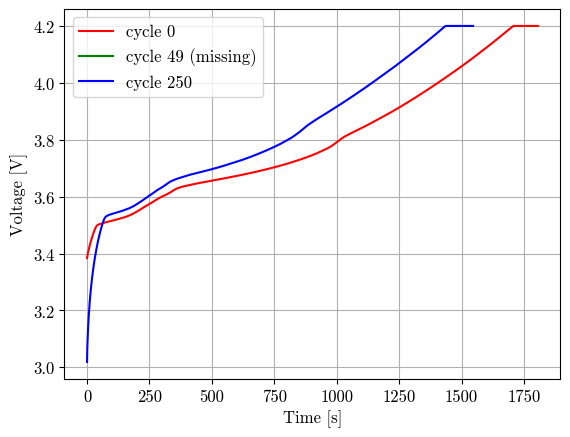

In [13]:
# plot charging cycle, first and last, y-axis voltage
print('Green should be missing (it was removed from the training set).')
df_train[(df_train['Cycle number'] == 0)].reset_index()['Voltage [V]'].plot(color='red', label='cycle 0')
df_train[(df_train['Cycle number'] == 49)].reset_index()['Voltage [V]'].plot(color='green', label='cycle 49 (missing)')
df_train[(df_train['Cycle number'] == 250)].reset_index()['Voltage [V]'].plot(color='blue', label='cycle 250')
plt.grid(True)
plt.xlabel('Time [s]')
plt.legend()
plt.ylabel('Voltage [V]')

In [14]:
# create dataset with features

# ToDo: implement your own features 

def prepare_features(df):
    datas_list = []
    max_cycle = df['Cycle number'].max()

    for ind in range(max_cycle + 1):
        cycle_mask = df['Cycle number'] == ind
        length = len(df[cycle_mask]['Time [s]'])

        if length == 0:
            continue

        maxV = df[cycle_mask]['Voltage [V]'].max()
        minV = df[cycle_mask]['Voltage [V]'].min()

        avgI = df[cycle_mask]['Current [mA]'].mean()
        stdI = df[cycle_mask]['Current [mA]'].std()

        minT = df[cycle_mask]['Time [s]'].min()
        maxT = df[cycle_mask]['Time [s]'].max()

        maxQ = df[cycle_mask]['Q [Ah]'].max()

        avgTemp = df[cycle_mask]['Temperature [C]'].mean()

        capa = df[cycle_mask]['Capacity [Ah]'].max()

        datas = [minV, maxV, maxT - minT, avgTemp, avgI, stdI, length, maxQ]
        features = ['Maximal V', 'Minimal V', 'Temperature Delta', 'Average Temperature', 'Average Current', 'Current Standard Deviation', 'Number of Samples', 'Total Charge']

        # Contrary to expectation, adding voltage samples did not really improve the result
        num_samples = 0
        voltage = df[cycle_mask].reset_index()['Voltage [V]']
        for i in range(num_samples):
            index = length // (num_samples + 2) * (i + 1)
            datas.append(voltage[index])
            features.append(f'Voltage {i}')

        datas.append(capa)
        datas_list.append(datas)

    return pd.DataFrame(datas_list, columns = features + ['capa']), features


In [15]:
# Remove the testing dataset
df_modelling, features = prepare_features(df_train)
df_modelling = df_modelling.dropna()
print(df_modelling)

     Maximal V  Minimal V  Temperature Delta  Average Temperature  \
0     3.384411   4.200424       18025.788856            24.121192   
1     3.015397   4.200384       18244.044918            22.291907   
2     3.013506   4.200424       18221.138916            24.521587   
3     3.013743   4.200384       18207.991899            22.899663   
4     3.013703   4.200424       18184.125897            24.048310   
..         ...        ...                ...                  ...   
356   3.023117   4.200463       13209.349378            30.700030   
357   3.021857   4.200463       13160.965373            34.593688   
358   3.021778   4.200463       13125.467369            35.655671   
359   3.021738   4.200463       13098.699366            35.977566   
360   3.021581   4.200502       13065.475558            37.291681   

     Average Current  Current Standard Deviation  Number of Samples  \
0         962.464115                  164.224150               1807   
1         962.093249         

In [16]:
# ToDo: try diferent models and different parameters of the tree to get the best precision
# ToDo: plot a few results to see the increase and decrease of error based on no trees, depths

import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn

# Assuming df is your dataframe
# Splitting the data into train and test sets
X = df_modelling[features]  # Features
#X = df_modelling[['avgTemp']]  # Features

y = df_modelling['capa']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
predictions = rf_model.predict(X_test)

# Evaluating the model
print('Training:')
# Convenience functions for metrics calculated below
print(f"Max error: {sklearn.metrics.max_error(y_test, predictions)}")
print(f"Mean Absolute Error: {sklearn.metrics.mean_absolute_error(y_test, predictions)}")
print(f"Mean Squared Error: {sklearn.metrics.mean_squared_error(y_test, predictions)}")

# Now you can use this trained model to make predictions on new data
prediction_error = (y_test - predictions)
e = [
    prediction_error.abs().max(),
    prediction_error.abs().mean(),
    (prediction_error**2).mean()
]

names = [
    'Maximal error',
    'Mean Absolute Deviation (MAD)',
    'Mean squared error (MSE)'
]

for name, val in zip(names,e):
    print(f'{name:30s} & {val:.2e} \\\\')

Training:
Max error: 0.02866431517659862
Mean Absolute Error: 0.005057264610040997
Mean Squared Error: 4.6491985970274595e-05
Maximal error                  & 2.87e-02 \\
Mean Absolute Deviation (MAD)  & 5.06e-03 \\
Mean squared error (MSE)       & 4.65e-05 \\


In [17]:
importances = [tree.feature_importances_ for tree in rf_model.estimators_]
sigma = np.std(importances, axis=0)
mu = np.mean(importances, axis=0) # the same as rf_model.feature_importances_
# Getting feature importances

print("Feature Importances:")
for importance, std_importance, feature_name in sorted(zip(mu, sigma, features), reverse=True, key=lambda x: x[0]):
    print(f"{feature_name:14} & {importance:.4f} & {std_importance:.4f} \\\\")

Feature Importances:
Temperature Delta & 0.4250 & 0.3142 \\
Number of Samples & 0.3646 & 0.2996 \\
Total Charge   & 0.1022 & 0.1987 \\
Average Current & 0.0411 & 0.1223 \\
Maximal V      & 0.0360 & 0.1129 \\
Current Standard Deviation & 0.0216 & 0.0830 \\
Average Temperature & 0.0048 & 0.0329 \\
Minimal V      & 0.0047 & 0.0333 \\


In [18]:
# create dataset with features
df_evaluation, features = prepare_features(df_test)
df_evaluation = df_evaluation.dropna()
print(df_evaluation)

    Maximal V  Minimal V  Temperature Delta  Average Temperature  \
0    3.013467   4.200384       18330.704871            22.925871   
1    3.013979   4.200384       18050.761883            24.461992   
2    3.015594   4.200384       17798.684122            24.511944   
3    3.014767   4.200384       17562.947832            26.099530   
4    3.014846   4.200345       17564.223832            24.419649   
5    3.014688   4.200384       17545.787830            26.190552   
6    3.014767   4.200345       17539.973830            25.273989   
7    3.014727   4.200384       17524.181828            24.805265   
8    3.017091   4.200384       16770.331749            22.411287   
9    3.017091   4.200424       16763.805749            22.888273   
10   3.322810   4.200345       16261.010772            25.156196   
11   3.018351   4.200384       15989.407668            25.598755   
12   3.019217   4.200384       15716.099639            24.881125   
13   3.021660   4.200424       14666.195530     

In [19]:
# Assuming df is your dataframe
# Splitting the data into train and test sets
X = df_evaluation[features]  # Features
#X = df_evaluation[['avgTemp']]  # Features
y = df_evaluation['capa']  # Target variable

predictions = rf_model.predict(X)

df_evaluation['predictions'] = predictions

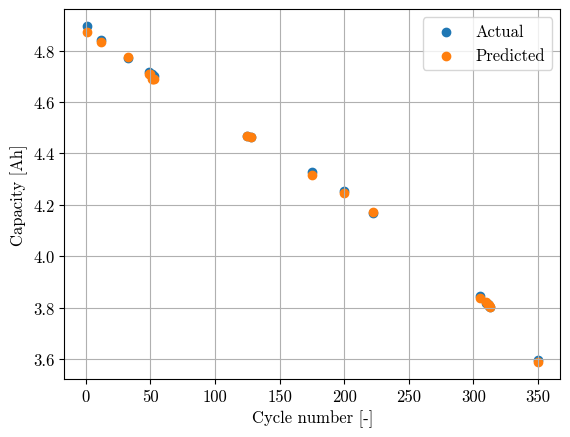

In [20]:
plt.scatter(ids_test, df_evaluation.capa, label='Actual')
plt.scatter(ids_test, df_evaluation.predictions, label='Predicted')
plt.xlabel('Cycle number [-]')
plt.ylabel('Capacity [Ah]')
plt.legend()
plt.grid(True)
save_jpg('figures/test.jpg')

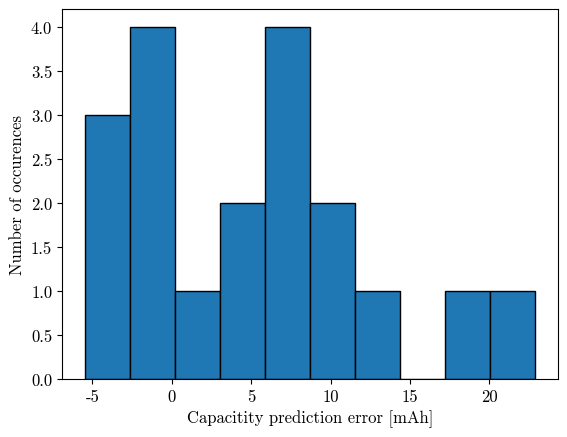

In [21]:
prediction_error = (df_evaluation.capa - df_evaluation.predictions)
(prediction_error * 1e3).plot(kind='hist', edgecolor='black')
plt.xlabel('Capacitity prediction error [mAh]')
plt.ylabel('Number of occurences')
save_jpg('figures/pred-error-hist.jpg')

In [22]:
e = [
    prediction_error.abs().max(),
    prediction_error.abs().mean(),
    (prediction_error**2).mean()
]

names = [
    'Maximal error',
    'Mean Absolute Deviation (MAD)',
    'Mean squared error (MSE)'
]

for name, val in zip(names,e):
    print(f'{name:30s} & {val:.2e} \\\\')

Maximal error                  & 2.29e-02 \\
Mean Absolute Deviation (MAD)  & 6.93e-03 \\
Mean squared error (MSE)       & 8.35e-05 \\
